## Import Libraries

As a first step, we import the Python libraries that we need.

In [132]:
# importing Python libraries
import pandas as pd
import numpy as np
import math

from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from numpy import where

import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import tree
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import plot_roc_curve

## Load datasets
The next step is to load the raw datasets. We have the raw .csv files in a 'data' folder in our repository. We load the .csv files using pandas and transform to dataframes for ease of processing:

In [133]:
# Load and read the features dataset
features_df = pd.read_csv('data/training_set_features.csv')

In [134]:
# Load and read the labels dataset
labels_df = pd.read_csv('data/training_set_labels.csv')

In [135]:
# Read the first 5 rows of the features dataset
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [136]:
# read the first 5 rows of the labels dataset
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [137]:
# merge the two dataframes on 'respondent_id' as the common column
df = pd.merge(labels_df,features_df,on='respondent_id')

For confirmation, read the first 5 rows of the new dataframe iusiong the .head() function:

In [138]:
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Our dataframe has 38 columns. Using Pandas .describe() method, we can retrieve the summary statistics of the dataframe. We will also explore further to determine how many null values are in the dataframe, by column.

In [139]:
# Obtain summary statistics
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [140]:
# Number of null values for each column
df.isnull().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In this project, we are looking at the seasonal flu vaccine. This dataframe has columns that are concerned only with the H1N1 vaccine, in addition to columns that are contain more than 50% null values. The null values in the remainder of the columns will be filled using modal imputation strategy.

In [141]:
df = df.drop(columns=['employment_occupation','employment_industry','health_insurance','respondent_id','h1n1_vaccine',
                 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seasonal_vaccine             26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

In [143]:
#fill in all Nan values with mode of each column
df = df.fillna(df.mode().iloc[0])

A little data exploration before modelling. We want to know: how many respondents think the seasonal flu is of any sort of health threat? Of that number, how many got the shot?

In [144]:
# subset the union of respondents who assume there's a risk of sickness from seasonal flu AND got the shot
shot_df = df[(df['opinion_seas_risk'] > 4) & (df['seasonal_vaccine'] == 1)]

In [145]:
# calculate the % ratio to the total number of respondents
len(shot_df) / len(df)

0.08248773729733777

What is the chance that a respondent gets the shot on the physician's recommendation?


In [146]:
doc_df = df[(df['doctor_recc_seasonal'] == 1) & (df['seasonal_vaccine'] == 0)]

In [147]:
1 - (len(doc_df) / len(df['doctor_recc_seasonal']))

0.9207323922567117

translated in plain words, this means that for every 100 respondents who received a physician's recommendation, 92 got the shot

Following modal imputation, we have taken care of the null values. To prepare the dataframe for the first model, we extract numerical columns as the logistic regression model does not work well with non-numeric values. 

In [148]:
# selecting numeric columns
num_df = df.select_dtypes(exclude='object')

num_df.dtypes

seasonal_vaccine                 int64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
dtype: object

With the null values out of the way, it is now possible to compute pairwise correlation of columns.



In [149]:
num_df.corr()

,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
seasonal_vaccine,1.000000,0.006013,0.076130,0.050020,0.112254,0.063722,0.053287,0.119925,0.360696,0.169465,0.013424,0.126977,0.358869,0.386916,-0.057066,-0.065137,-0.111680
behavioral_antiviral_meds,0.006013,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.031682,0.004637,0.026183,0.007145,0.014498,0.081503,0.078618,0.044829,0.083090
behavioral_avoidance,0.076130,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.070761,0.042054,0.000952,0.002232,0.117356,0.127991,0.084346,0.017995,0.038977
behavioral_face_mask,0.050020,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.065301,0.062200,0.036828,0.065645,0.040889,0.105917,0.084084,0.014191,0.004794
behavioral_wash_hands,0.112254,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.099317,0.030205,0.035749,0.052930,0.136936,0.170655,0.087218,0.009367,0.047451
behavioral_large_gatherings,0.063722,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.087315,0.099621,0.020074,-0.032226,0.078208,0.130800,0.131414,-0.030994,-0.009126
behavioral_outside_home,0.053287,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.081252,0.093675,0.016657,-0.035128,0.066861,0.117428,0.133080,-0.026542,-0.008937
behavioral_touch_face,0.119925,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.099753,0.029966,0.026506,0.066284,0.104530,0.141537,0.089156,-0.001233,0.023739
doctor_recc_seasonal,0.360696,0.031682,0.070761,0.065301,0.099317,0.087315,0.081252,0.099753,1.000000,0.203121,0.038741,0.058775,0.171801,0.228514,0.028387,-0.031818,-0.042053
chronic_med_condition,0.169465,0.004637,0.042054,0.062200,0.030205,0.099621,0.093675,0.029966,0.203121,1.000000,0.003533,-0.019810,0.093160,0.166381,0.061349,-0.067277,-0.102541


In [150]:
X = num_df.drop("seasonal_vaccine", axis=1)
y = num_df["seasonal_vaccine"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

# 1st Model-"Dummy" Model

Let's start with a completely "dummy" model, that will always choose the majority class.

In [151]:
dummy_model = DummyClassifier(strategy="most_frequent")

Fit the model on our data

In [152]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

We should expect all predictions to be the same

In [153]:
# just grabbing the first 50 to save space
dummy_model.predict(X_train)[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Model Evaluation

Let's do some cross-validation to see how the model would do in generalizing to new data it's never seen.

In [154]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.53295057, 0.53295057, 0.53295057, 0.53295057, 0.5332002 ])

So, the mean accuracy is a little over 53% if we always guess the majority class.

In [155]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [156]:
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train)

CV Results for `dummy` model:
            0.53300 ± 0.00024 accuracy
        


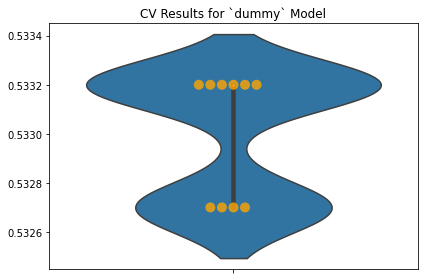

In [157]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

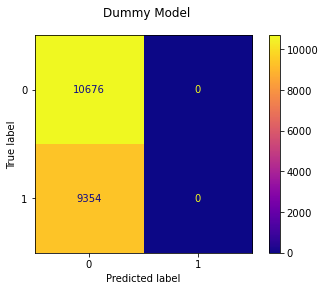

In [158]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [159]:
# just the numbers (this should work even with older scikit-learn)
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[10676,     0],
       [ 9354,     0]])

A pretty lopsided confusion matrix!

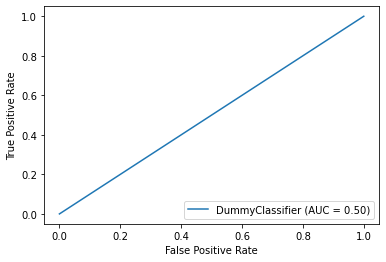

In [160]:
plot_roc_curve(dummy_model, X_train, y_train);

# 2nd Model - Logistic Regression

Let's use a logistic regression and compare its performance.We're going to specifically avoid any regularization (the default) to see how the model does with little change. So we'll pass `'none'` to the `penalty` parameter to not use any regularization. 

In [161]:
simple_logreg_model = LogisticRegression(random_state=2021, penalty='none')

In [162]:
simple_logreg_model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=2021)

Look at the predictions:

In [163]:
simple_logreg_model.predict(X_train)[:50]

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1])

In [164]:
## Model Evaluation, Part 2

In [165]:
simple_logreg_results = ModelWithCV(
                        model=simple_logreg_model,
                        model_name='simple_logreg',
                        X=X_train, 
                        y=y_train
)

CV Results for `simple_logreg` model:
            0.75622 ± 0.00889 accuracy
        


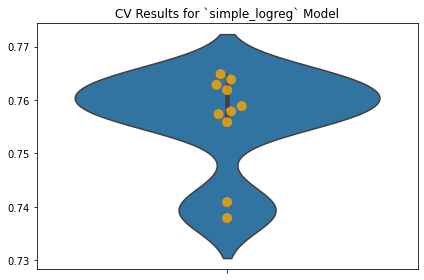

In [166]:
# Saving variable for convenience
model_results = simple_logreg_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

So the mean accuracy is better when the model is actually taking in information from the features instead of always guessing the majority class.

In [167]:
confusion_matrix(y_train, simple_logreg_model.predict(X_train))

array([[8503, 2173],
       [2691, 6663]])

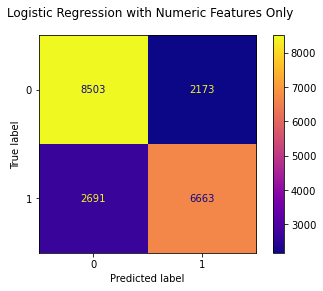

In [168]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with Numeric Features Only")

plot_confusion_matrix(simple_logreg_model, X_train, y_train, ax=ax, cmap="plasma");

So, in general we are not labeling many of the "not survived" passengers as "survived", but for "survived" passengers we're getting it wrong most of the time.

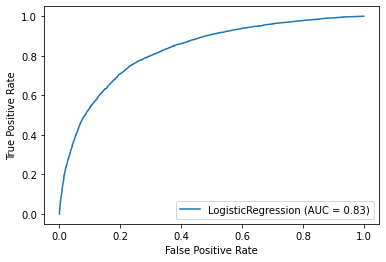

In [169]:
plot_roc_curve(simple_logreg_model, X_train, y_train);

This model is doing better than just choosing the most frequent class every time, but it probably could do better. 

We can say this model is likely underfitting, which means we need _more complexity_. We can add more complexity a few different ways. We'll try doing some feature engineering/data preparation.

## Returning to Data Preparation - Re-splitting Train and Test

In [170]:
X = df.drop(columns='seasonal_vaccine')
y = df['seasonal_vaccine']

In [171]:
X

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0


In [172]:
col = ['behavioral_antiviral_meds','behavioral_avoidance',
       'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
       'behavioral_outside_home','behavioral_touch_face','doctor_recc_seasonal',
       'chronic_med_condition','child_under_6_months','health_worker','opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults','household_children',
       'x0_35 - 44 Years', 'x0_45 - 54 Years','x0_55 - 64 Years','x0_65+ Years',
       'x1_< 12 Years','x1_College Graduate','x1_Some College','x2_Hispanic','x2_Other or Multiple',
       'x2_White', 'x3_Male', 'x4_> $75,000', 'x4_Below Poverty', 'x5_Not Married', 'x6_Rent', 
       'x7_Not in Labor Force', 'x7_Unemployed', 'x8_bhuqouqj', 'x8_dqpwygqj','x8_fpwskwrf', 'x8_kbazzjca',
       'x8_lrircsnp','x8_lzgpxyit','x8_mlyzmhmf','x8_oxchjgsf', 'x8_qufhixun','x9_MSA, Principle City', 'x9_Non-MSA']

In [173]:
pd.set_option('display.max_columns', None)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## One Hot Encoding: Categorical Variables

In [175]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

## Standard Scaler: Numerical Variables

In [176]:
X_train_nums = X_train.select_dtypes('float64')

ss = StandardScaler()

ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

# X-Train: Rejoining Numerical and Categorical Dataframes

In [177]:
X_train_clean = pd.concat([nums_df, dums_df], axis=1)

In [178]:
X_train_clean.columns = col

In [179]:
X_train_clean

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,x8_bhuqouqj,x8_dqpwygqj,x8_fpwskwrf,x8_kbazzjca,x8_lrircsnp,x8_lzgpxyit,x8_mlyzmhmf,x8_oxchjgsf,x8_qufhixun,"x9_MSA, Principle City",x9_Non-MSA
15654,-0.221158,-1.636851,-0.271702,-2.186473,1.334461,-0.708087,0.691304,1.509737,1.626998,-0.295743,-0.346856,-0.022911,0.939177,1.440622,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14559,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,-1.185177,-0.573503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13752,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,0.691304,-0.662367,1.626998,-0.295743,-0.346856,0.904171,1.667749,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
21985,-0.221158,-1.636851,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-1.246538,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18196,-0.221158,-1.636851,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,-0.614629,-0.295743,-0.346856,0.904171,-0.517966,-0.068447,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-1.877075,-1.246538,-0.822981,0.151710,2.676383,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17289,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,-1.185177,0.509792,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,-0.614629,-0.295743,-0.346856,0.904171,0.939177,1.440622,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12172,-0.221158,0.610929,3.680505,0.457358,1.334461,1.412257,0.691304,-0.662367,-0.614629,3.381312,-0.346856,0.904171,0.939177,-0.822981,-1.185177,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# X-Test: Rejoining Numerical and Categorical Dataframes

In [180]:
X_test_cat = X_test.select_dtypes('object')

test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_cat.index)

In [181]:
X_test_nums = X_test.select_dtypes('float64')

test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                           index=X_test_nums.index)

In [182]:
X_test_clean = pd.concat([test_nums_df,
                 test_dums_df], axis=1)

In [183]:
X_test_clean.columns = col

In [184]:
X_test_clean

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,x8_bhuqouqj,x8_dqpwygqj,x8_fpwskwrf,x8_kbazzjca,x8_lrircsnp,x8_lzgpxyit,x8_mlyzmhmf,x8_oxchjgsf,x8_qufhixun,"x9_MSA, Principle City",x9_Non-MSA
25567,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,1.626998,-0.295743,-0.346856,-0.022911,0.210606,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6023,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-1.877075,0.939177,-0.822981,-1.185177,1.593088,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
22055,-0.221158,-1.636851,-0.271702,-2.186473,-0.749366,-0.708087,0.691304,1.509737,1.626998,3.381312,-0.346856,0.904171,1.667749,2.195157,1.488596,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7914,-0.221158,0.610929,-0.271702,-2.186473,1.334461,1.412257,0.691304,1.509737,1.626998,-0.295743,2.883045,-0.022911,1.667749,1.440622,0.151710,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12380,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,-1.446541,1.509737,-0.614629,-0.295743,-0.346856,0.904171,1.667749,-0.068447,0.151710,0.509792,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,2.195157,0.151710,-0.573503,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1060,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,-1.446541,-0.662367,1.626998,-0.295743,-0.346856,-1.877075,-1.246538,-0.068447,-1.185177,-0.573503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23125,-0.221158,-1.636851,-0.271702,-2.186473,-0.749366,-0.708087,-1.446541,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,1.488596,-0.573503,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14895,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-1.246538,-0.822981,1.488596,-0.573503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3rd Model: Logistic Regression 

In [185]:
first_logreg_model = LogisticRegression(random_state=1, penalty='none')

In [186]:
first_logreg_model.fit(X_train_clean, y_train)

LogisticRegression(penalty='none', random_state=1)

In [187]:
y_pred = first_logreg_model.predict(X_train_clean)

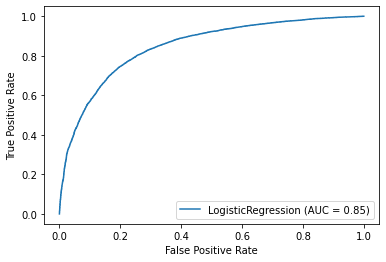

In [188]:
plot_roc_curve(first_logreg_model, X_train_clean, y_train)

## 3rd Model Evaluation

In [189]:
cv_logregresults = cross_val_score(first_logreg_model, X_train_clean, y_train, cv=10)

cv_logregresults.mean()

0.7735396904643036

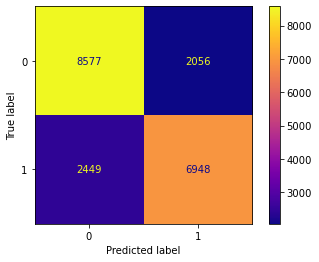

In [190]:
plot_confusion_matrix(first_logreg_model, X_train_clean, y_train, cmap="plasma");

In [191]:
confusion_matrix(y_train, first_logreg_model.predict(X_train_clean))

array([[8577, 2056],
       [2449, 6948]])

In [192]:
precision_score(y_train, y_pred)

0.7716570413149711

In [193]:
accuracy_score(y_train, y_pred)

0.7750873689465801

In [194]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     10633
           1       0.77      0.74      0.76      9397

    accuracy                           0.78     20030
   macro avg       0.77      0.77      0.77     20030
weighted avg       0.77      0.78      0.77     20030



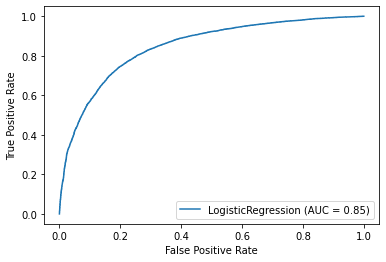

In [195]:
plot_roc_curve(first_logreg_model, X_train_clean, y_train)

# Decision Tree

In [196]:
ct = DecisionTreeClassifier(max_depth=2, random_state=42)

ct.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [197]:
ct.score(X_test_clean, y_test)

0.7323648345065149

In [198]:
param_dict ={"max_depth":range(1,10),
             "min_samples_split":[100,500,1000,5000],"min_samples_leaf":[100,500,1000,5000]}

In [199]:
# Define the parameter grid
gs = GridSearchCV(ct, param_grid=param_dict, cv=5,verbose=1,n_jobs=-1)

In [200]:
gs.fit(X_train_clean, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   24.9s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': [100, 500, 1000, 5000],
                         'min_samples_split': [100, 500, 1000, 5000]},
             verbose=1)

In [201]:
gs.best_params_

{'max_depth': 9, 'min_samples_leaf': 100, 'min_samples_split': 100}

In [202]:
gs.best_score_

0.7590114827758362

In [203]:
gs.best_estimator_.score(X_test_clean, y_test)

0.7702561030402876

In [204]:
gs.cv_results_

{'mean_fit_time': array([0.0708672 , 0.07966962, 0.07772527, 0.09563432, 0.08191123,
        0.06965303, 0.06418381, 0.05545454, 0.06460557, 0.0652946 ,
        0.06390882, 0.0757998 , 0.09470444, 0.07341437, 0.09529572,
        0.08537512, 0.12798104, 0.13307576, 0.121421  , 0.1178781 ,
        0.10517278, 0.08353643, 0.09313045, 0.10024557, 0.12601581,
        0.1102397 , 0.09044642, 0.09795446, 0.0907156 , 0.08150496,
        0.08014069, 0.08812656, 0.14340353, 0.13699961, 0.10615497,
        0.10876241, 0.12154193, 0.12584639, 0.13126359, 0.11282463,
        0.11683807, 0.11129079, 0.10671563, 0.10873036, 0.08449578,
        0.08097081, 0.08466187, 0.08803935, 0.17122831, 0.11987758,
        0.1685348 , 0.11515594, 0.14723878, 0.15736632, 0.17120461,
        0.11762605, 0.12175093, 0.11997919, 0.10962358, 0.11755662,
        0.07645211, 0.07803345, 0.07826262, 0.07592053, 0.18475685,
        0.1773931 , 0.16594396, 0.11747489, 0.18726158, 0.20053396,
        0.17757959, 0.11141715,

In [205]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070867,0.003270,0.010972,0.003096,1,100,100,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.684723,0.675237,0.666500,0.677733,0.685472,0.677933,0.006942,133
1,0.079670,0.008409,0.010908,0.001861,1,100,500,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.684723,0.675237,0.666500,0.677733,0.685472,0.677933,0.006942,133
2,0.077725,0.019620,0.016530,0.003517,1,100,1000,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.684723,0.675237,0.666500,0.677733,0.685472,0.677933,0.006942,133
3,0.095634,0.014827,0.015150,0.004550,1,100,5000,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.684723,0.675237,0.666500,0.677733,0.685472,0.677933,0.006942,133
4,0.081911,0.015107,0.019573,0.007444,1,500,100,"{'max_depth': 1, 'min_samples_leaf': 500, 'min...",0.684723,0.675237,0.666500,0.677733,0.685472,0.677933,0.006942,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.124627,0.011044,0.013276,0.004073,9,1000,5000,"{'max_depth': 9, 'min_samples_leaf': 1000, 'mi...",0.715926,0.711932,0.724913,0.717174,0.712681,0.716525,0.004626,64
140,0.094868,0.007876,0.012987,0.002331,9,5000,100,"{'max_depth': 9, 'min_samples_leaf': 5000, 'mi...",0.684723,0.675237,0.691962,0.677733,0.685472,0.683025,0.005956,97
141,0.089118,0.004813,0.014192,0.002122,9,5000,500,"{'max_depth': 9, 'min_samples_leaf': 5000, 'mi...",0.684723,0.675237,0.691962,0.677733,0.685472,0.683025,0.005956,97
142,0.081601,0.011984,0.012014,0.002132,9,5000,1000,"{'max_depth': 9, 'min_samples_leaf': 5000, 'mi...",0.684723,0.675237,0.691962,0.677733,0.685472,0.683025,0.005956,97


In [206]:
ct2 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=100, random_state=42)

ct2.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=100,
                       random_state=42)

In [207]:
y_pred = ct2.predict(X_test_clean)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [208]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 77.02561030402876


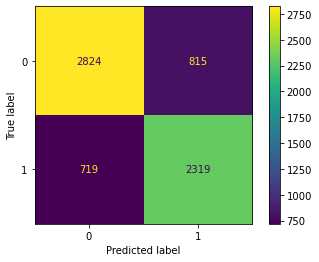

In [209]:
plot_confusion_matrix(ct2, X_test_clean, y_test);

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(ct2, ax=ax, fontsize=10)
plt.show()

# Best Feature

In [ ]:
X = X_train_clean
y = y_train
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()